In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
709,spam,4mths half price Orange line rental & latest c...,NaN,NaN,NaN
3123,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
442,ham,Oic... I saw him too but i tot he din c me... ...,NaN,NaN,NaN
4467,ham,Much better now thanks lol,NaN,NaN,NaN
2223,spam,"Thanks for your ringtone order, ref number K71...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
2957,spam,U have a secret admirer. REVEAL who thinks U R...
4353,spam,important information 4 orange user 0789xxxxxx...
853,ham,\AH POOR BABY!HOPE URFEELING BETTERSN LUV! PRO...
4756,ham,"hey, looks like I was wrong and one of the kap..."
5510,ham,I went to project centre


In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
760,spam,"Romantic Paris. 2 nights, 2 flights from å£79 ..."
2661,ham,Do you know when dad will be back?
2833,ham,U sick still can go shopping?
3064,ham,"Sounds good, keep me posted"


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target']) # ham=0, spam=1
df.sample(5)

,target,text
851,0,"I am real, baby! I want to bring out your inne..."
4080,0,Hurry home. Soup is DONE!
3900,0,That depends. How would you like to be treated...
210,0,"What's up bruv, hope you had a great break. Do..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
## check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
## remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

In [17]:
## EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

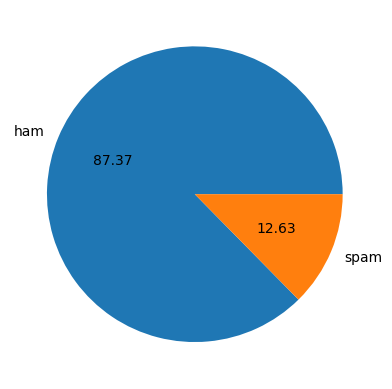

In [20]:
from matplotlib import pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
df.sample(5)

,target,text
2933,0,Yup n her fren lor. I'm meeting my fren at 730.
3338,0,Babe !!!! I LOVE YOU !!!! *covers your face in...
4200,0,Wylie update: my weed dealer carlos went to fr...
4815,0,Anything is valuable in only 2 situations: Fir...
1057,0,Ard 515 like dat. Y?


In [22]:
import nltk

In [23]:
## Check number of characters, words, sentences in each message
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kimberly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df["num_characters"] = df["text"].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
## num of words
df["num_words"] = df["text"].apply(lambda x:len(nltk.wordpunct_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [31]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [32]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,19.202747,1.965564
std,0.332253,58.236293,13.963696,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,28.000000,2.000000
max,1.000000,910.000000,210.000000,38.000000


In [34]:
df[df["target"] == 0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.448627,1.820195
std,0.0,56.358207,13.769106,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,9.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,210.000000,38.000000


In [35]:
df[df["target"] == 1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,31.333844,2.970904
std,0.0,30.137753,7.997049,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,28.000000,2.000000
50%,1.0,149.000000,33.000000,3.000000
75%,1.0,157.000000,36.000000,4.000000
max,1.0,224.000000,49.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

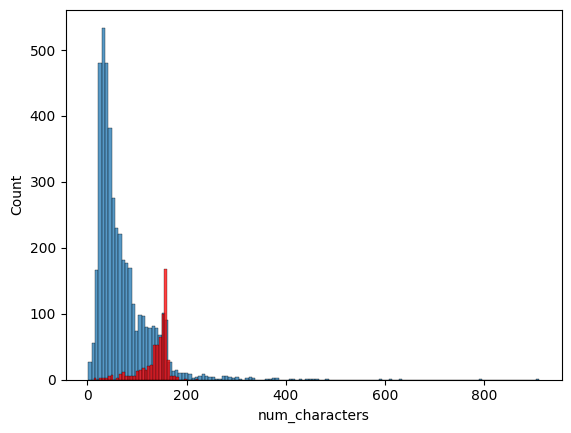

In [ ]:
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

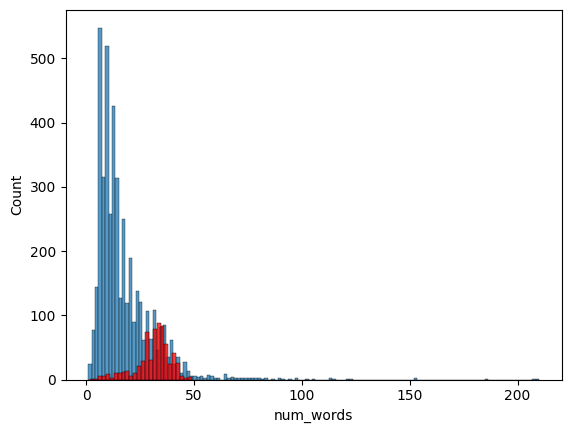

In [40]:
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color='red')

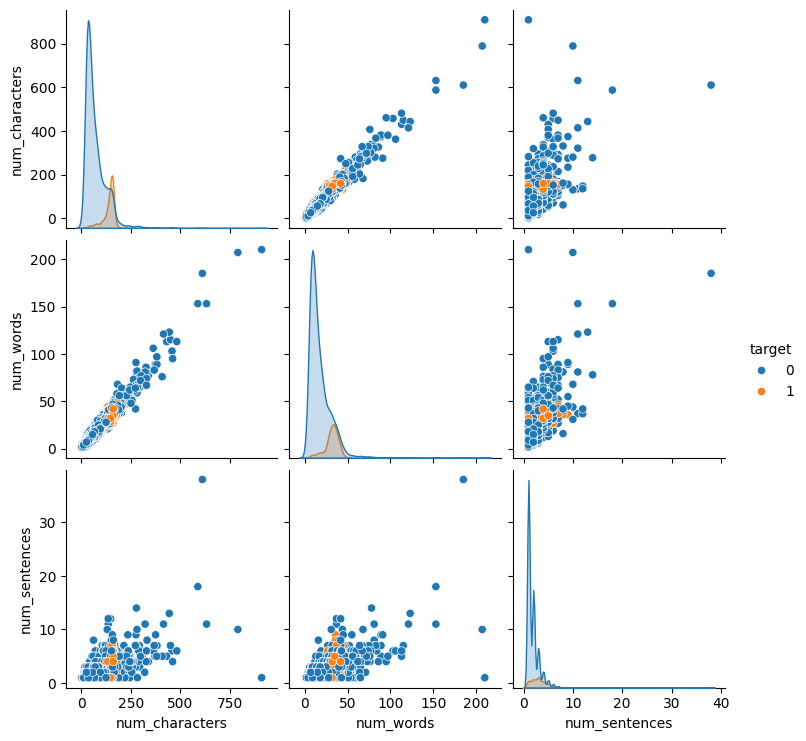

In [43]:
sns.pairplot(df, hue="target")

In [ ]:
df.columns

As there is multicollinearity between all 3, you should choose only 1 feature i.e. num_characters as it has highest correlation with target

<Axes: >

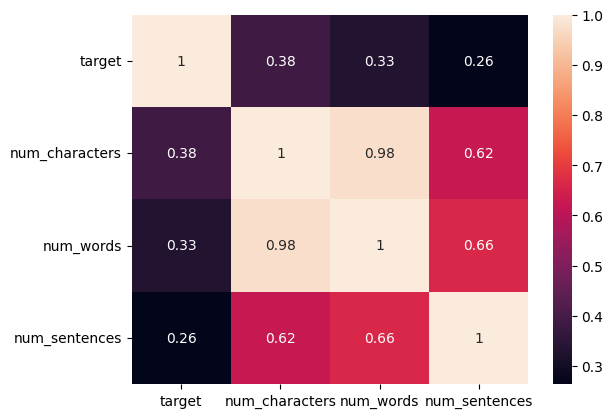

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Data preprocessing

- Lower case
- Toeknization
- Remove special characters
- Remove stop words and punctuation
- Stemming

In [64]:
from nltk.corpus import stopwords
stop_list = stopwords.words("english")

In [65]:
stop_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem("loving")

'love'

In [82]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        ## remove special characters
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()

    ## Remove stop words and punctuation
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()

## Stemming
    for i in text:
        y.append(ps.stem(i))

    str_y = " ".join(y)

    return str_y

In [83]:
transform_text("Hi how are you %%? Hope you've been good Kim! I've been drinking all day and I'm exhausted")

'hi hope good kim drink day exhaust'

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [85]:
df["text_preprocessed"] = df["text"].apply(lambda x: transform_text(x))

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentences,text_preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


### Wordcloud of spam and ham

In [93]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [94]:
spam_wc = wc.generate(df[df["target"] == 1]["text_preprocessed"].str.cat(sep=" "))

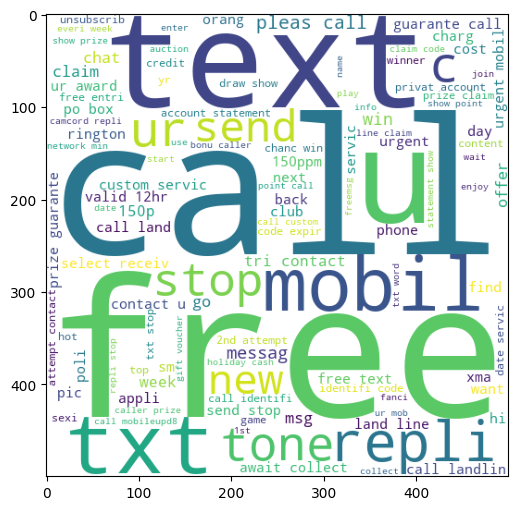

In [97]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [99]:
ham_wc = wc.generate(df[df["target"] == 0]["text_preprocessed"].str.cat(sep=" "))

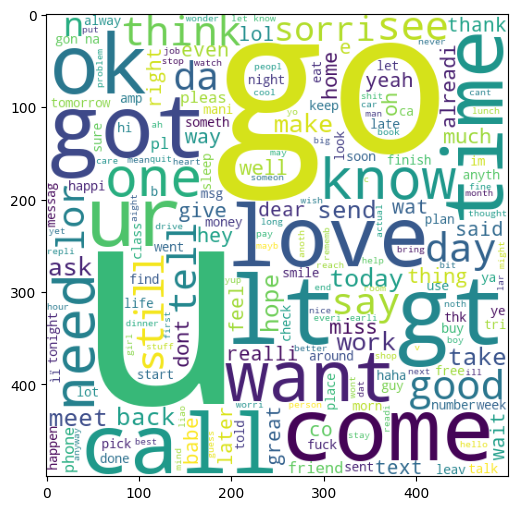

In [102]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)

### Count top 30 words in spam and ham

In [114]:
spam_list = df[df["target"] == 1]["text_preprocessed"].to_list()

spam_word_list = []

for sent in spam_list:
    for word in sent.split(): ## very imp to do a sent.split()
        spam_word_list.append(word)

In [115]:
len(spam_word_list)

9939

In [ ]:
from collections import Counter
Counter(spam_word_list).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [124]:
spam_df = pd.DataFrame(Counter(spam_word_list).most_common(30))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

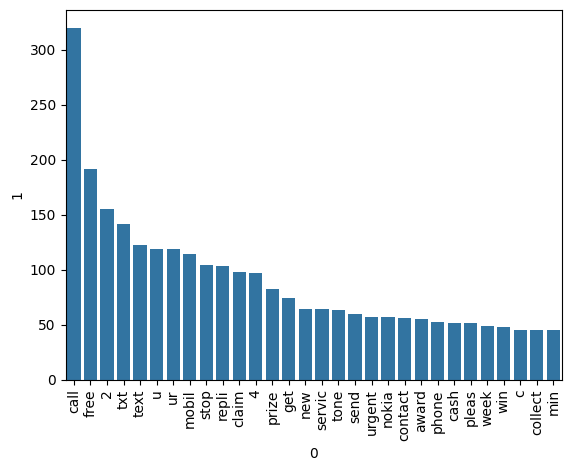

In [128]:
sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation="vertical")

In [118]:
ham_list = df[df["target"] == 0]["text_preprocessed"].to_list()

ham_word_list = []

for sent in ham_list:
    for word in sent.split():
        ham_word_list.append(word)


In [129]:
ham_df = pd.DataFrame(Counter(ham_word_list).most_common(30))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

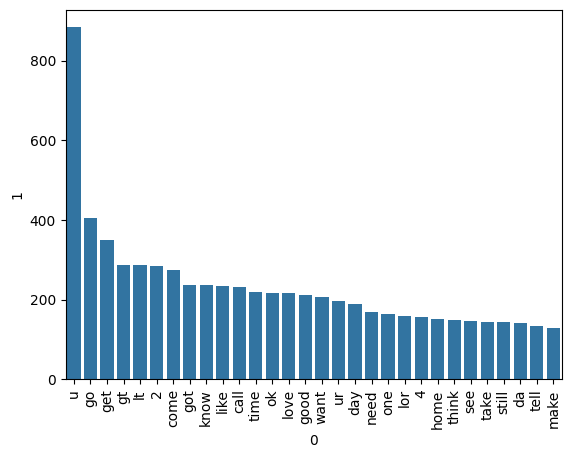

In [130]:
sns.barplot(x=ham_df[0], y=ham_df[1])
plt.xticks(rotation="vertical")

### Model Building

In [132]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'text_preprocessed'],
      dtype='object')

In [151]:
df.head()

,target,text,num_characters,num_words,num_sentences,text_preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [226]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
cv.fit_transform(df["text_preprocessed"]).shape


(5169, 6708)

In [227]:
# X = cv.fit_transform(df["text_preprocessed"]).toarray()
X = tfidf.fit_transform(df["text_preprocessed"]).toarray()



In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# ## appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [139]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [152]:
X.shape

(5169, 6708)

In [154]:
df["target"].values

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [153]:
df["target"].values.reshape(1,-1)

array([[0, 0, 1, ..., 0, 0, 0]], shape=(1, 5169))

In [156]:
df["target"].values.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], shape=(5169, 1))

In [180]:
y = df["target"].values


In [ ]:
# y = df["target"].values.reshape(1,-1)

In [142]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

TP = is spam, caught as spam  
TN = is not spam, arrived in inbox  
FP = not spam, flagged as spam -- bad as it could be a bank notice or a job offer. Need to reduce FP, so precision matters more than recall.   
FN = is spam, arrived in box -- not so bad  

Spam classification -- reduce False Positives -- high Precision application

In [168]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score ## you want to reduce FP i.e. increase precision

In [229]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [194]:
y_test

array([0, 0, 0, ..., 0, 0, 0], shape=(1034,))

In [195]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8858800773694391
[[793 103]
 [ 15 123]]
0.5442477876106194


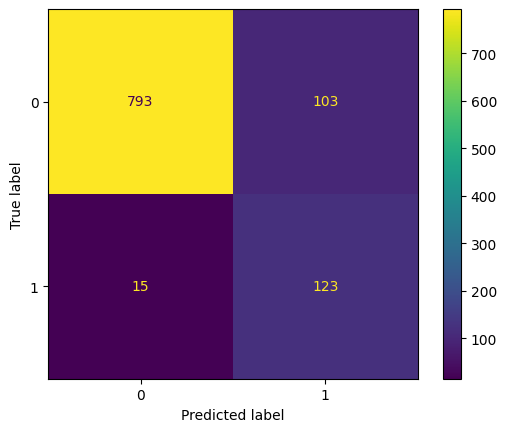

In [196]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred1))

cm_display.plot()
plt.show()

In [197]:
# mnb.fit(X_train, y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test, y_pred2))
# print(precision_score(y_test, y_pred2))

In [230]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [199]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
### tfidf --> MNB

### Improvements

1. Give max features to tfidf vectorizer to choose important ones
2. Try scaling using min max scaler for X
3. Add num_characters to the model along with X
4. Try combining models i.e. voting classifier
5. Stacking classifier

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [202]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [203]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [204]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [205]:
train_classifier(svc,X_train,y_train,X_test,y_test)

c:\Users\Kimberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


(0.8665377176015474, 0.0)

In [206]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\Kimberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8723404255319149
Precision -  1.0
For  NB
Accuracy -  0.9448742746615088
Precision -  0.8857142857142857
For  DT
Accuracy -  0.9497098646034816
Precision -  0.8771929824561403
For  LR
Accuracy -  0.965183752417795
Precision -  0.9473684210526315
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.941972920696325
Precision -  0.89
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.896
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.971953578336557
Precision -  0.936


In [207]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [208]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.872340,1.000000
5,RF,0.974855,0.991228
8,ETC,0.974855,0.974576
4,LR,0.965184,0.947368
10,xgb,0.971954,0.936000
9,GBDT,0.951644,0.931373
7,BgC,0.962282,0.896000
6,AdaBoost,0.941973,0.890000
2,NB,0.944874,0.885714
3,DT,0.949710,0.877193


In [209]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [210]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.872340
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.965184
4,xgb,Accuracy,0.971954
5,GBDT,Accuracy,0.951644
6,BgC,Accuracy,0.962282
7,AdaBoost,Accuracy,0.941973
8,NB,Accuracy,0.944874
9,DT,Accuracy,0.949710


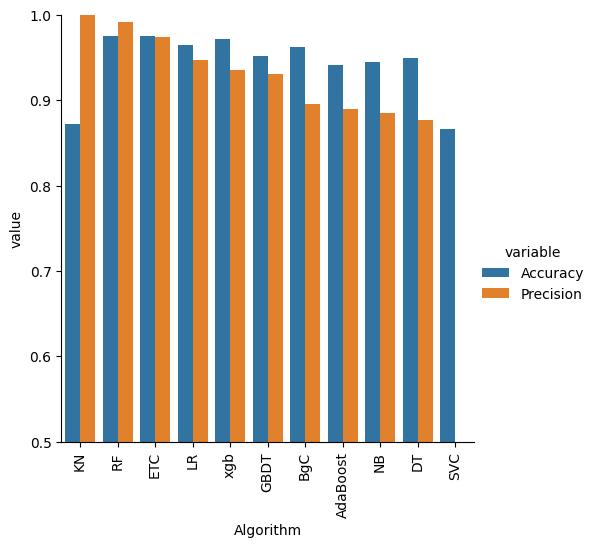

In [211]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [212]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [213]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [214]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [215]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [216]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [217]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.872340,1.000000,0.872340,1.000000,0.872340,1.000000,0.872340,1.000000
1,RF,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368
4,xgb,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000,0.971954,0.936000
5,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
6,BgC,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000
7,AdaBoost,0.941973,0.890000,0.941973,0.890000,0.941973,0.890000,0.941973,0.890000
8,NB,0.944874,0.885714,0.944874,0.885714,0.944874,0.885714,0.944874,0.885714
9,DT,0.949710,0.877193,0.949710,0.877193,0.949710,0.877193,0.949710,0.877193


In [218]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [219]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [220]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [221]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9506769825918762
Precision 1.0


In [222]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [223]:
from sklearn.ensemble import StackingClassifier

In [224]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [231]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [232]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

When input comes in, you need to:
1. preprocess the text -- stopwords removal etc
2. vectorizer it using the tfidf with max features 3000
3. Fit the mnb model to it